In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = pd.read_csv("iris.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Split data into features (X) and target (y)
X = data.drop("variety", axis=1)
y = data["variety"]


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100,  random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [9]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


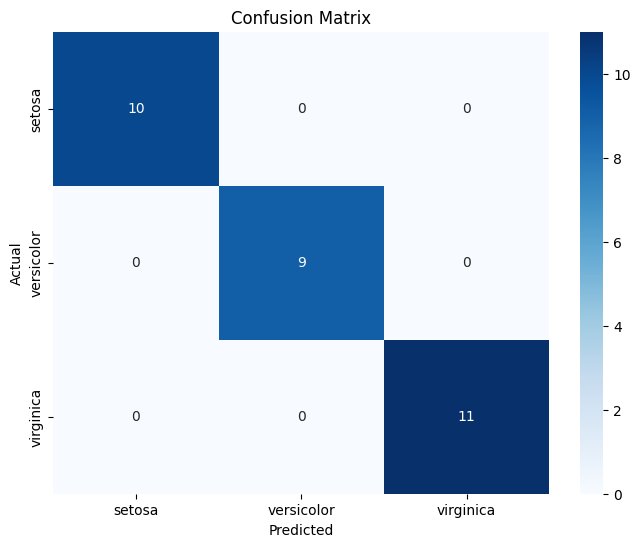

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

columns =["setosa","versicolor","virginica"]
# Construir la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=columns, yticklabels=columns)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

In [13]:
data = {
    'Test': y_test,
    'Predict': y_pred,
}   

dresult = pd.DataFrame(data)

In [14]:
dresult

,Test,Predict
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


array([[<Axes: title={'center': 'Test'}>,
        <Axes: title={'center': 'Predict'}>]], dtype=object)

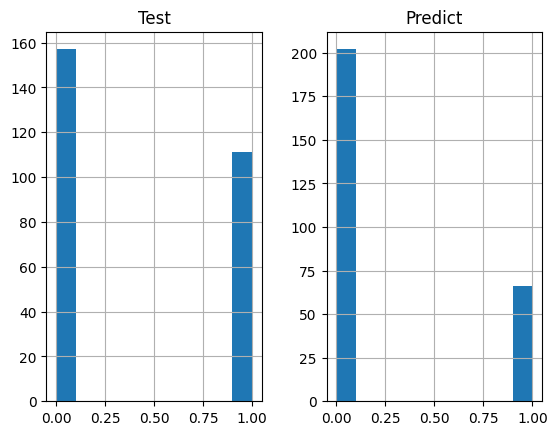

In [72]:
dresult.hist()